In [4]:
#Base
import pandas as pd
import numpy as np
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
#Disable Warnings
import warnings
warnings.filterwarnings("ignore")

#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

#Train-Test Split
from sklearn.model_selection import train_test_split
#Cross Validation untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold
#Grid Search
from sklearn.model_selection import GridSearchCV

#Save Model
import pickle

In [5]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df=df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<AxesSubplot: >

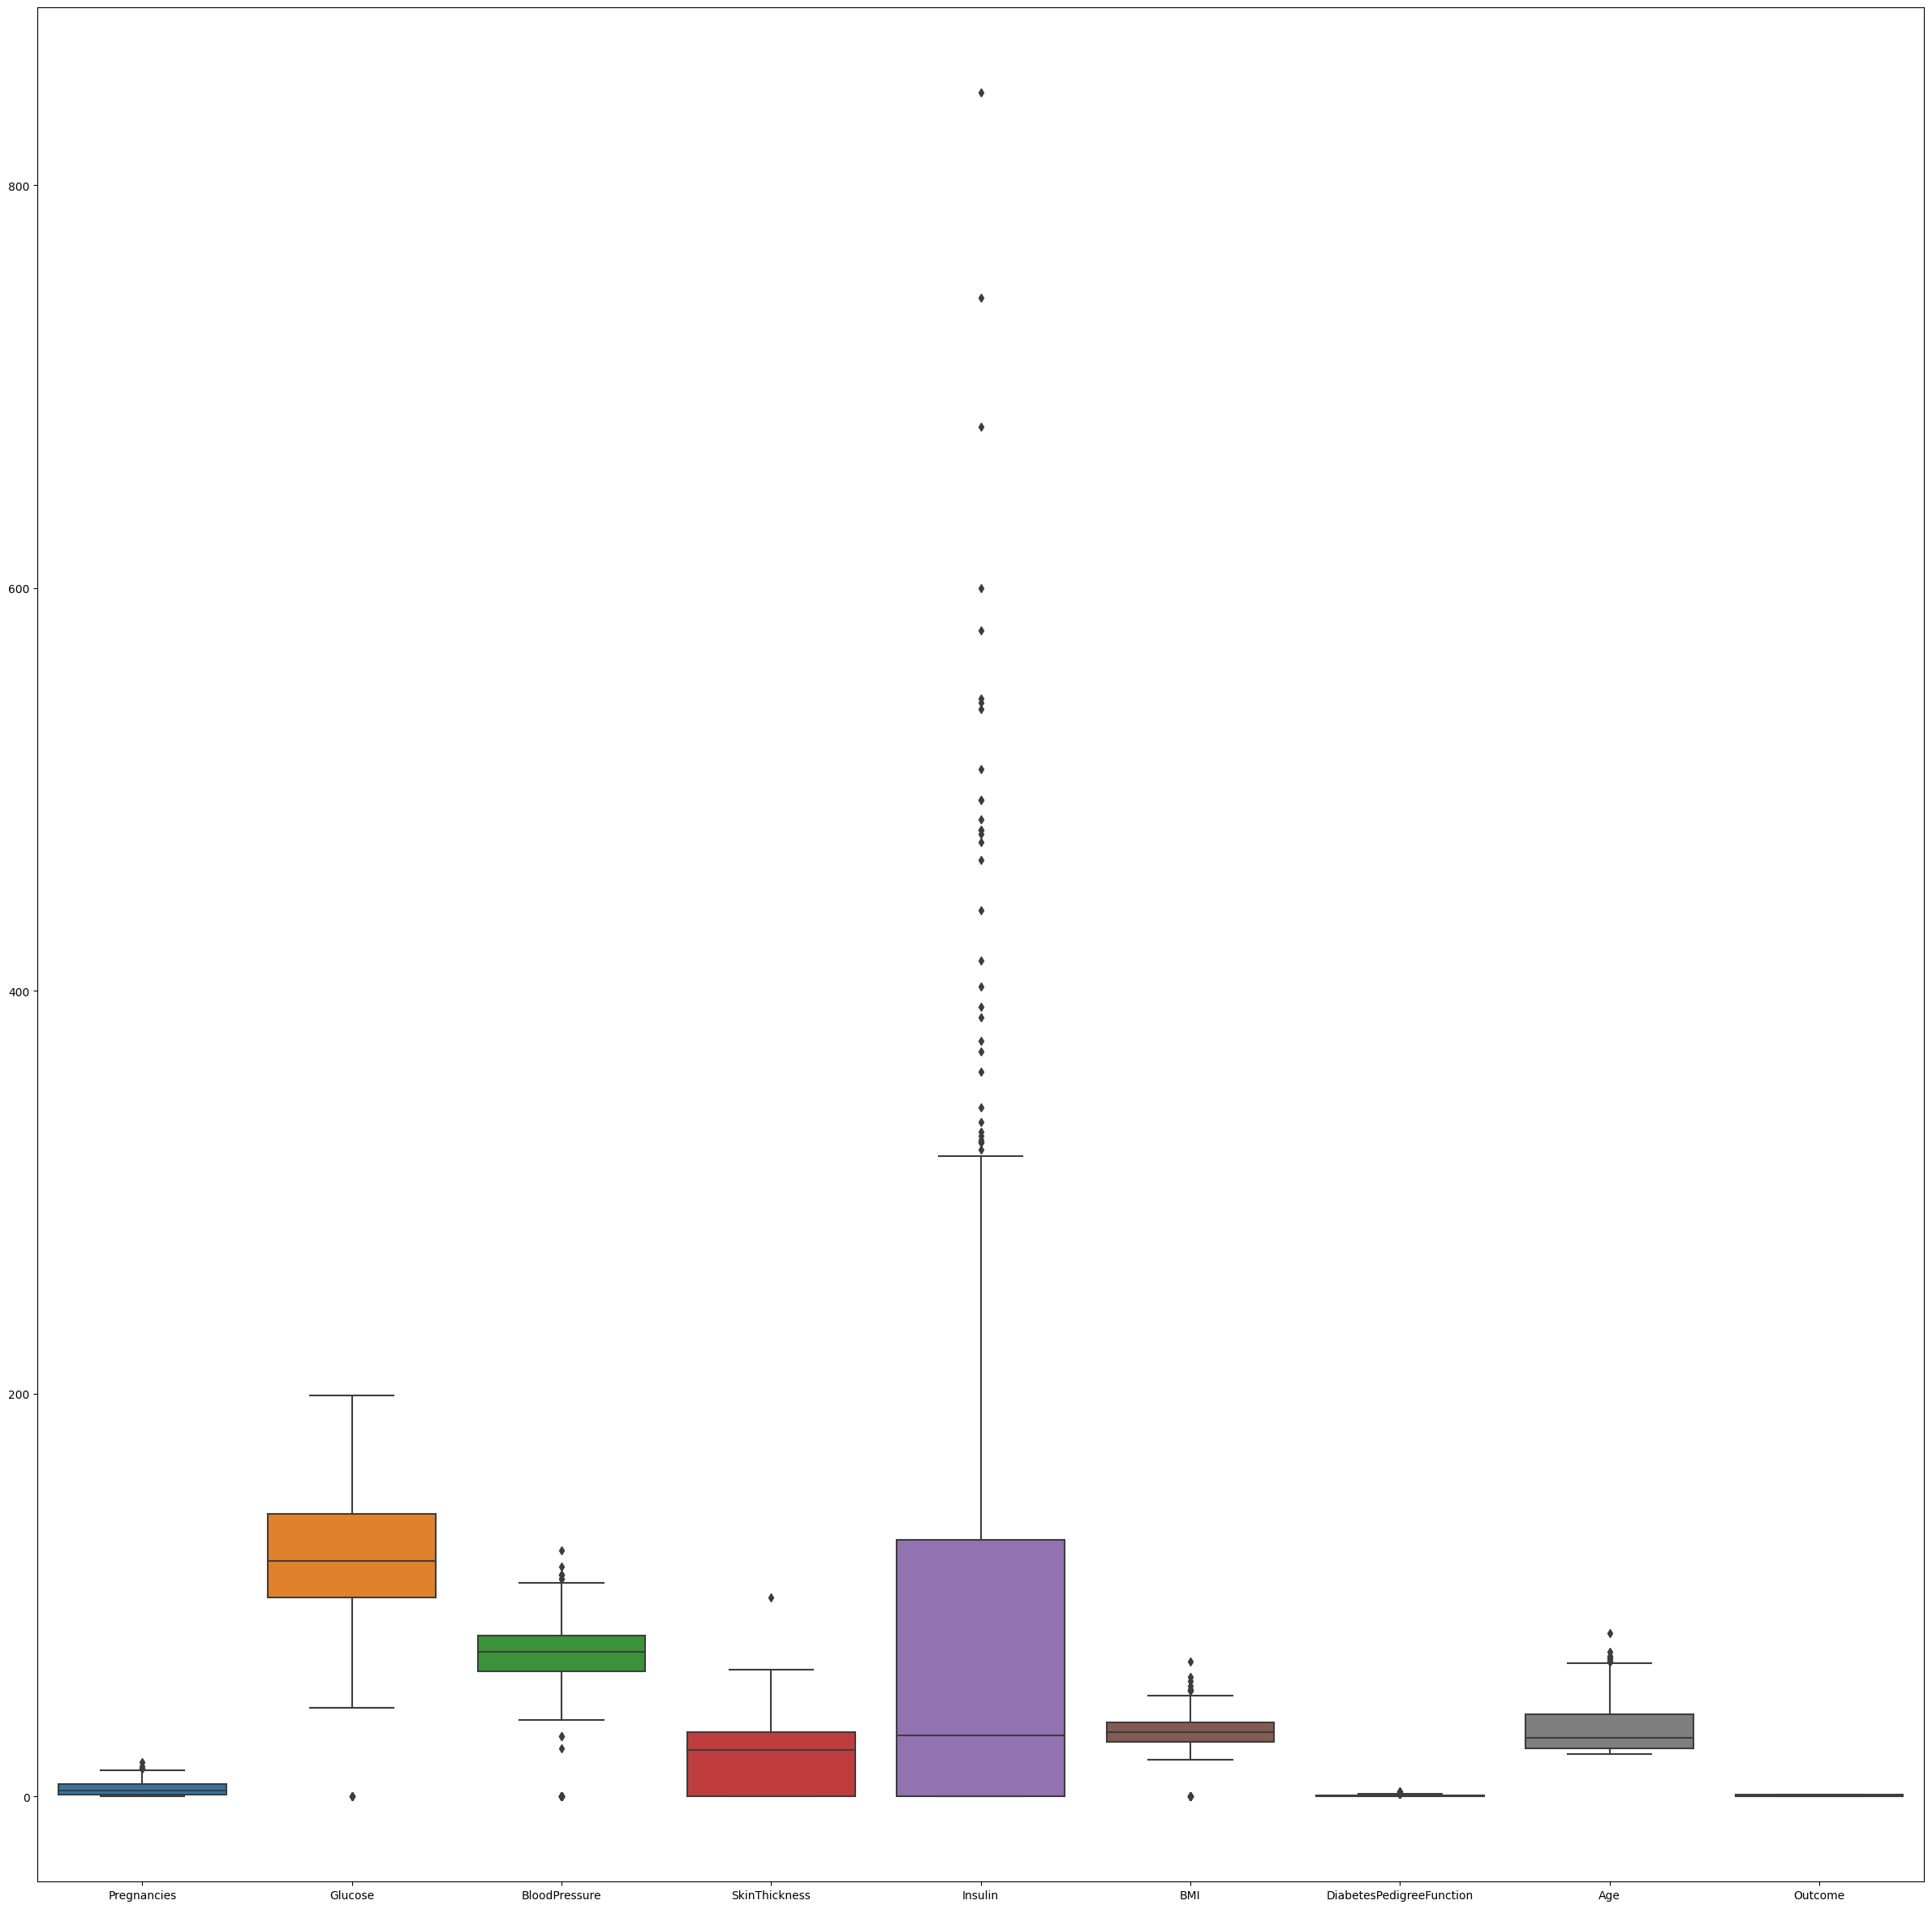

In [8]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)


In [9]:
Q1 = (df[df.columns]).quantile(0.25)
Q3 = (df[df.columns]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)




Nilai Maximum dari masing-masing Variable adalah: 
Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64


<AxesSubplot: >

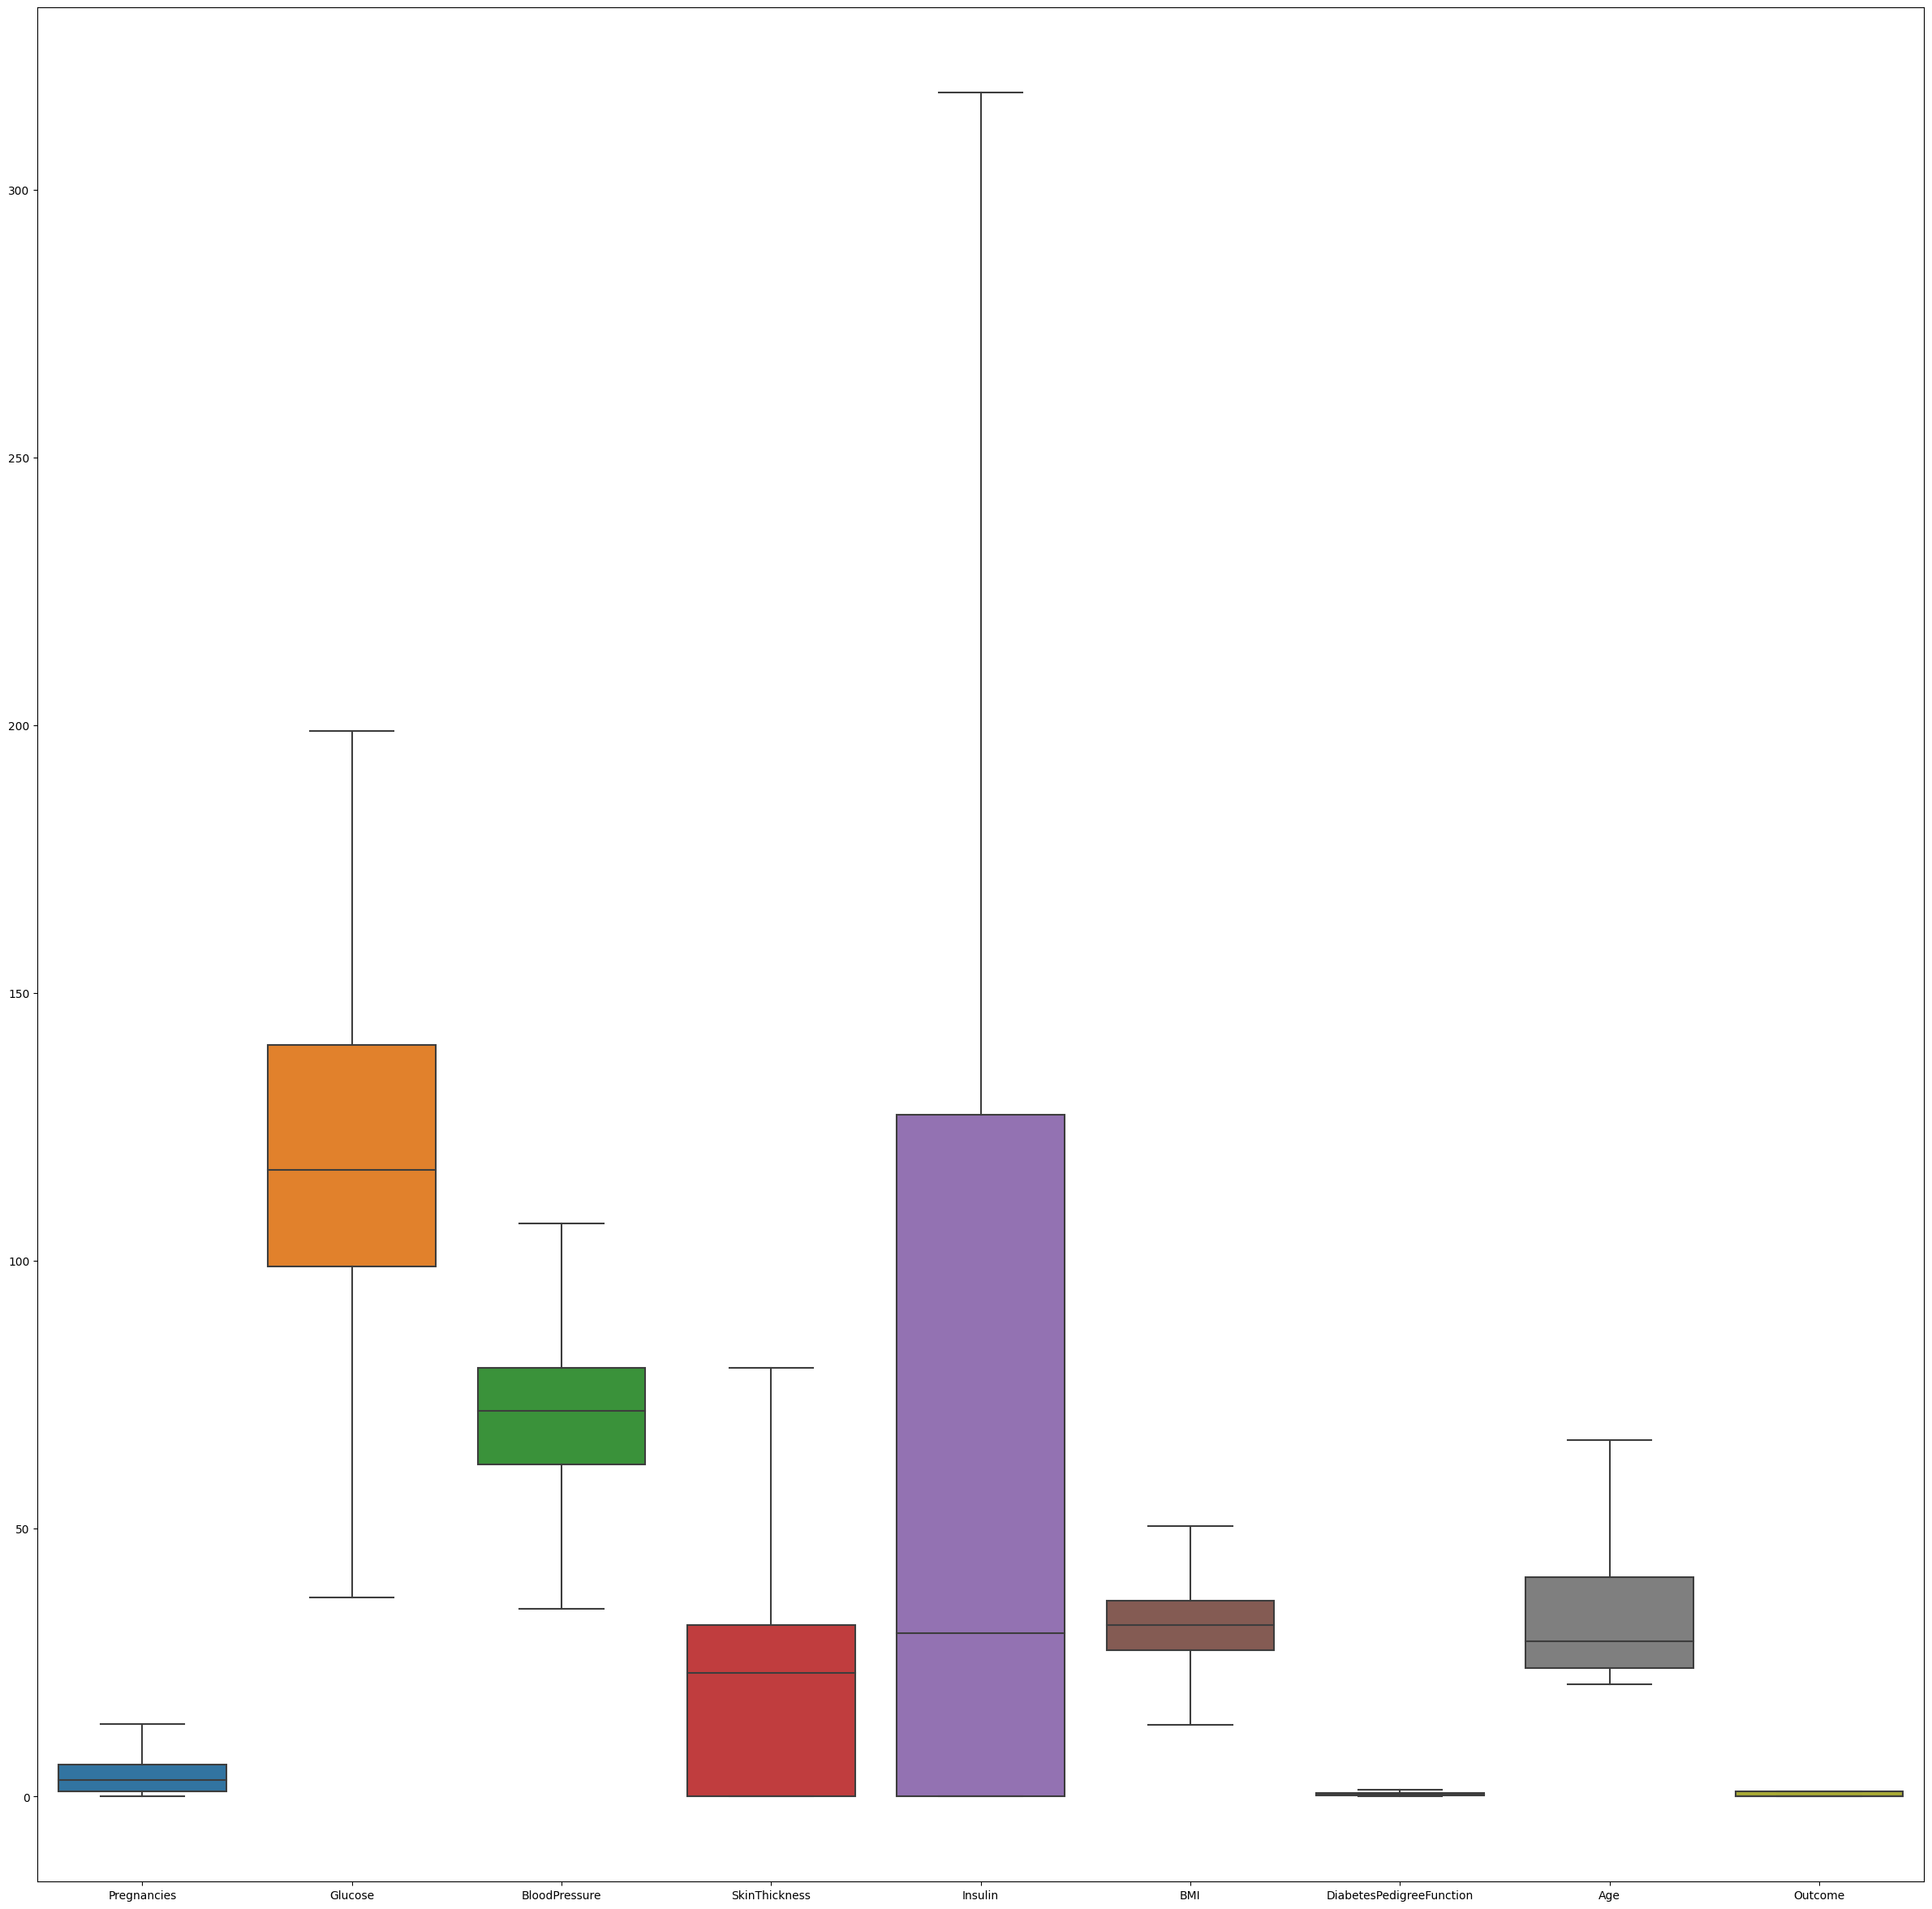

In [10]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

<AxesSubplot: xlabel='Outcome', ylabel='count'>

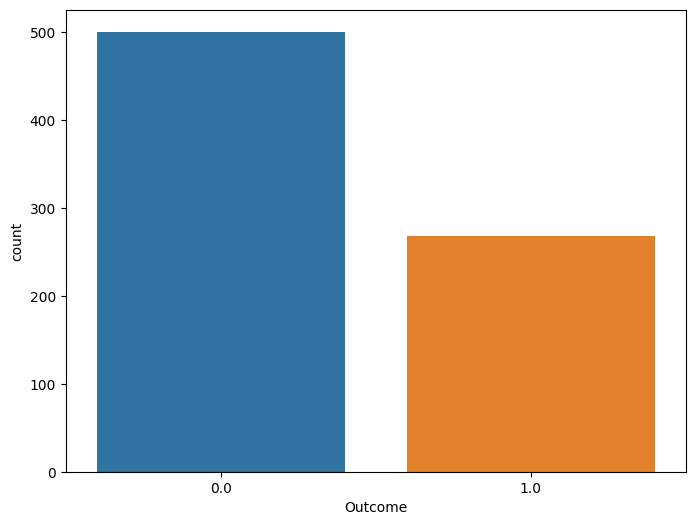

In [22]:
# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(data= df, x= 'Outcome')


<AxesSubplot: >

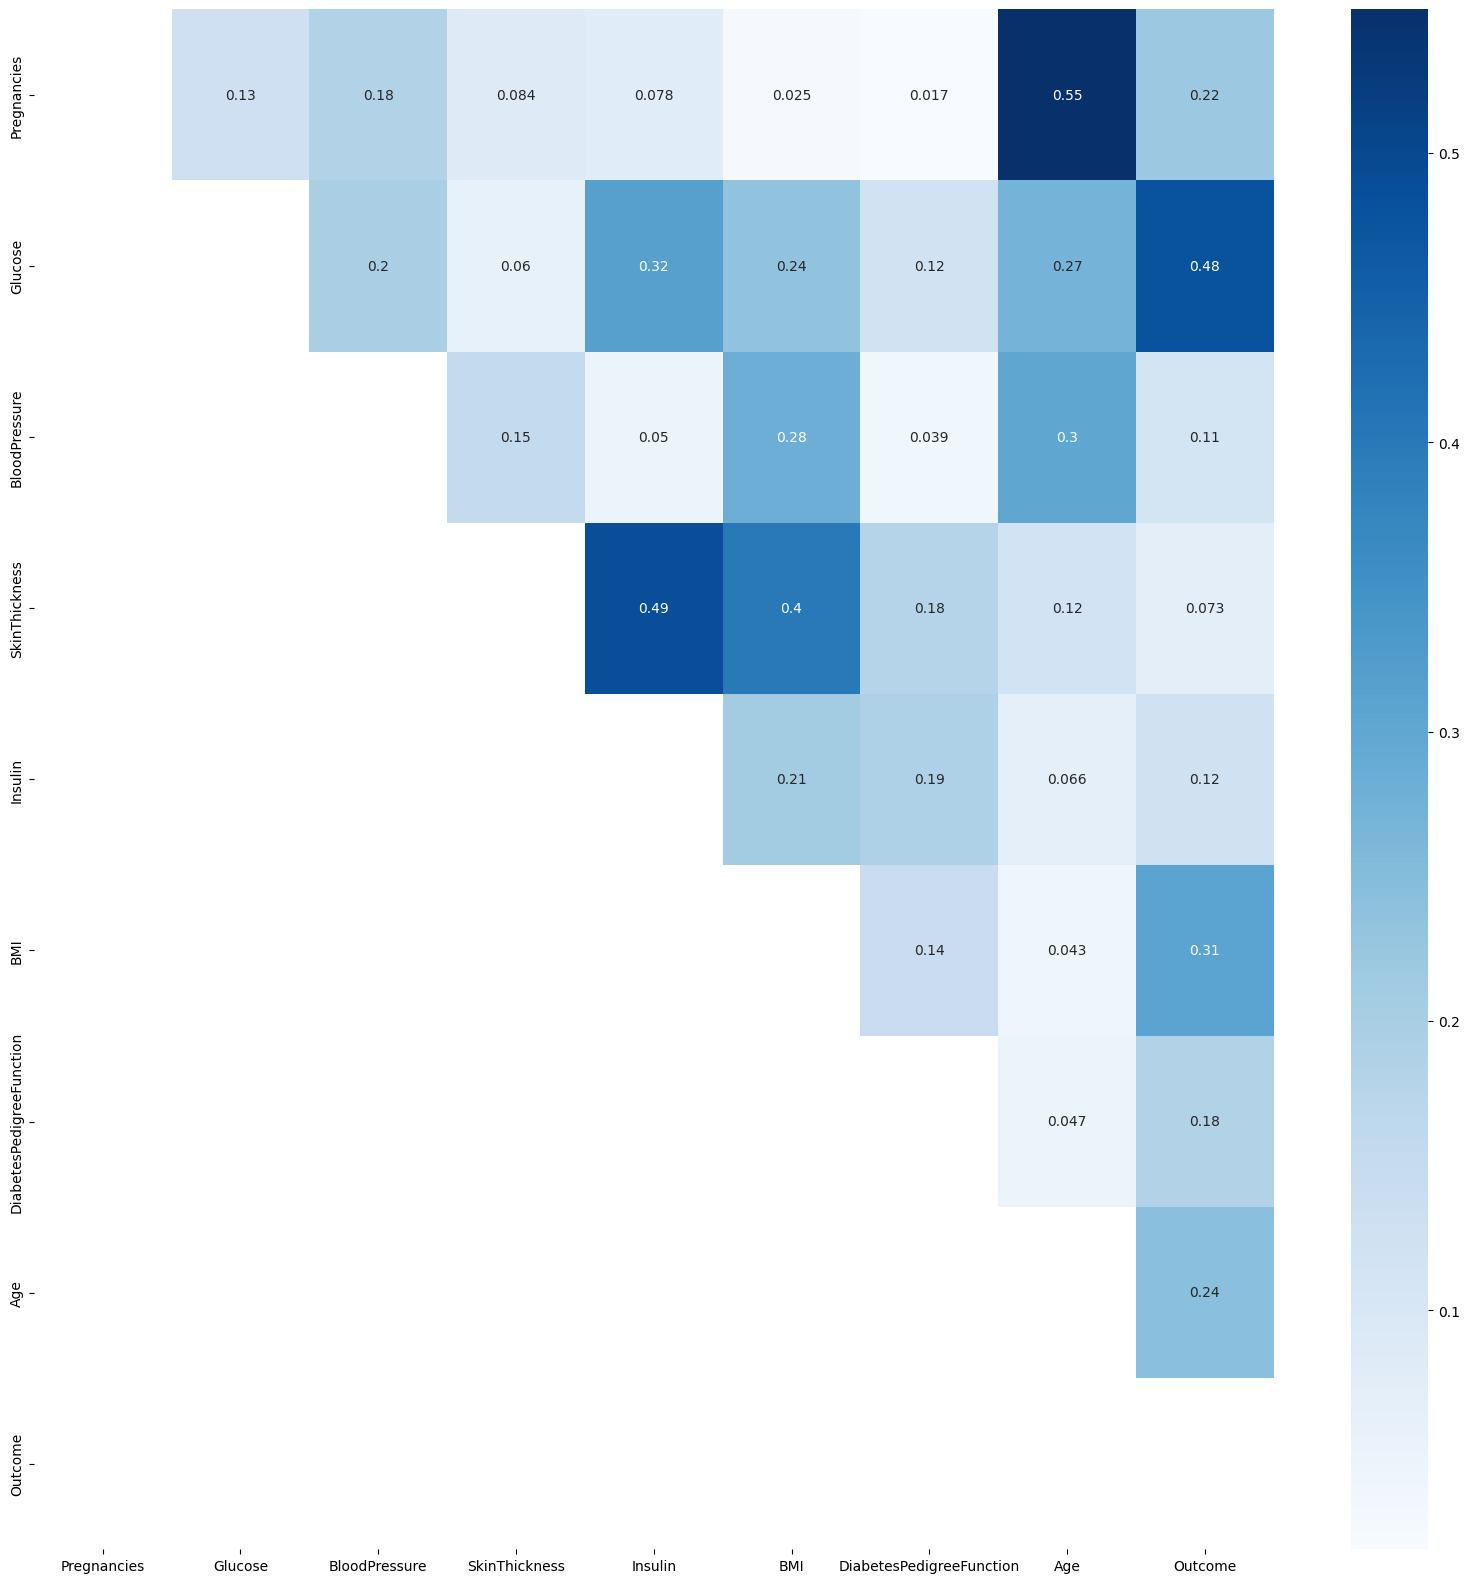

In [12]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper, annot=True, cmap='Blues')


In [13]:
# Memisahkan mana X dan mana y
y= df['Outcome']
X= df.drop(['Outcome'],1)
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [14]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.7012987012987013], 1 of KFold 5
DecisionTreeClassifier Recall: [0.6481481481481481], 1 of KFold 5
DecisionTreeClassifier Precission: [0.5645161290322581], 1 of KFold 5
DecisionTreeClassifier AUC: [0.6890740740740741], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.7012987012987013], 2 of KFold 5
DecisionTreeClassifier Recall: [0.6481481481481481], 2 of KFold 5
DecisionTreeClassifier Precission: [0.5645161290322581], 2 of KFold 5
DecisionTreeClassifier AUC: [0.68

In [15]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
1,LogisticRegression,0.777993,0.779951,0.738214,0.574843,0.732421,0.001958
7,GradientBoostingClassifier,0.928386,0.761693,0.679919,0.604682,0.725341,0.166694
6,RandomForestClassifier,1.000000,0.761684,0.696692,0.563382,0.715691,0.238316
8,ExtraTreesClassifier,1.000000,0.755208,0.680713,0.567296,0.711648,0.244792
4,SVC,0.766600,0.755148,0.737886,0.466317,0.688159,0.011452
3,GaussianNB,0.756508,0.749928,0.653520,0.626834,0.721417,0.006580
9,XGBClassifier,1.000000,0.721305,0.608895,0.563312,0.684656,0.278695
2,KNeighborsClassifier,0.811200,0.700501,0.582816,0.507547,0.655774,0.110699
0,DecisionTreeClassifier,1.000000,0.684815,0.553184,0.589518,0.662759,0.315185
5,LinearSVC,0.634397,0.604295,0.279272,0.332425,0.541212,0.030102


In [16]:
#Grid Search


model = LogisticRegression(max_iter = 4000)

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [17]:
clf1 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = True)
clf1.fit(X,y)


Fitting 50 folds for each of 240 candidates, totalling 12000 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=1),
             estimator=LogisticRegression(max_iter=4000), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=True)

In [18]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))


Best Score: 0.7702953908836261
Best Hyperparameters: {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}


In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)



X_train dataset shape:  (614, 8)
y_train dataset shape:  (614,)
X_test dataset shape:  (154, 8)


In [20]:
# Melatih Model
model = LogisticRegression(**clf1.best_params_).fit(X_train,y_train)
# Test Model
y_pred_train=model.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       401
         1.0       0.73      0.58      0.65       213

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



Confusion Matrix: [[355  89]
 [ 46 124]]


<AxesSubplot: >

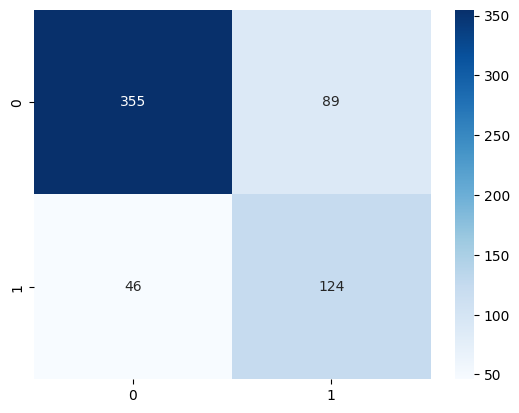

In [21]:
cm_train = confusion_matrix(y_pred_train, y_train)
print('Confusion Matrix: {}'.format(cm_train))
## visualisasi
sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='.3g')
